Equation is y = -0.054190 + 1.694465x + -0.800812x^2 + 0.084969x^3.


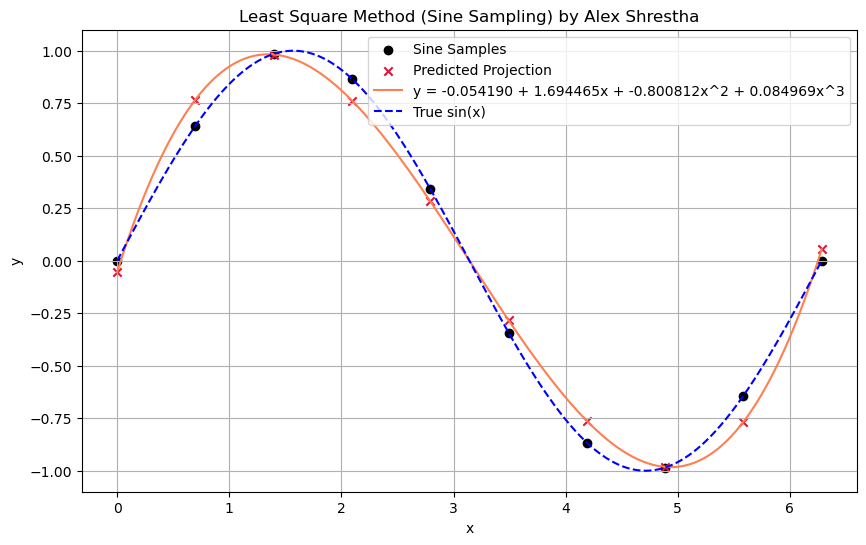

In [2]:
# Least Square Method for Polynomial Fitting by Alex Shrestha (080BCT012)
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Least Squares polynomial coefficients of given degree
def LSM_polynomial(x, y, degree):
    n = len(x)
    x = np.asarray(x)
    y = np.asarray(y)
    
    # Calculate sums of powers of x for the normal equations
    sum_x = np.zeros((2 * degree,))
    for i in range(2 * degree):
        sum_x[i] = np.sum(x**i)
    
    # Construct the normal equation matrix
    mat = np.zeros((degree, degree))
    for i in range(degree):
        for j in range(degree):
            mat[i, j] = sum_x[i + j]
    
    # Calculate sums of x^i * y for the right-hand side
    sum_xy = np.zeros((degree,))
    for i in range(degree):
        sum_xy[i] = np.sum((x**i) * y)
    
    # Solve the system using Cramer's rule
    D = np.linalg.det(mat)
    if np.isclose(D, 0):
        raise ValueError("Determinant is zero; system may be singular.")

    C = np.zeros((degree,))
    for i in range(degree):
        mat_temp = mat.copy()
        mat_temp[:, i] = sum_xy
        C[i] = np.linalg.det(mat_temp) / D

    return C

# Sine sampling: sample points from y = sin(x) in [0, 2π]
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)

# Find the coefficients of the best-fit cubic polynomial
C = LSM_polynomial(x, y, 4)
print(rf"Equation is y = {C[0]:.6f} + {C[1]:.6f}x + {C[2]:.6f}x^2 + {C[3]:.6f}x^3.")

# Predicted y values using the fitted polynomial
y_pred = C[0] + C[1]*x + C[2]*x**2 + C[3]*x**3

# Plotting function for the results
def plotLSM(x, y, y_pred, C, string):
    import os
    os.makedirs('Images', exist_ok=True)  # Create Images folder if it doesn't exist
    plt.figure(figsize=(10, 6))
    
    # Plot the original sine samples
    plt.scatter(x, y, marker='o', color="#000000", label="Sine Samples")
    
    # Plot the predicted polynomial values at sample points
    plt.scatter(x, y_pred, color='crimson', label="Predicted Projection", marker='x')
   
    # Plot the fitted polynomial curve
    x_inter = np.linspace(min(x), max(x), 1000)
    y_inter = C[0] + C[1]*x_inter + C[2]*x_inter**2 + C[3]*x_inter**3
    plt.plot(x_inter, y_inter, color='coral', label=string)
    
    # Plot the true sine curve for reference
    plt.plot(x_inter, np.sin(x_inter), color='blue', linestyle='--', label='True sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Least Square Method (Sine Sampling) by Alex Shrestha')
    plt.grid()
    plt.legend()
    plt.savefig('Images/polynomial_sine.png')
    plt.show()

# Call the plotting function with the results
plotLSM(x, y, y_pred, C, rf"y = {C[0]:.6f} + {C[1]:.6f}x + {C[2]:.6f}x^2 + {C[3]:.6f}x^3")

In [ ]:
# Newton-Raphson Method for Systems of Nonlinear Equations by  Alex Shrestha   
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def f1(x, y):
    return x**2 + y - x - 1

def f2(x, y):
    return x**2 - 2*y**2 - y

# Partial derivatives for the Jacobian
def df1dx(x, y):
    return 2 * x - 1

def df1dy(x, y):
    return 1

def df2dx(x, y):
    return 2 * x

def df2dy(x, y):
    return -4 * y - 1

# Jacobian matrix
def jacobMatrix(x, y):
    return np.array([
        [df1dx(x, y), df1dy(x, y)],
        [df2dx(x, y), df2dy(x, y)]
    ])

# Newton-Raphson method for systems
def newtonRhapsonMethod(X0, epsilon=1e-6, max_iterations=1000):
    X = X0
    for _ in range(max_iterations):
        F = np.array([
            [f1(X[0][0], X[1][0])],
            [f2(X[0][0], X[1][0])]
        ])
        dF = jacobMatrix(X[0][0], X[1][0])
        dF_inv = np.linalg.inv(dF)
        X1 = X - np.dot(dF_inv, F)
        if np.linalg.norm(X1 - X) < epsilon:
            return X1
        X = X1
    print("Max iterations reached.")
    return X

# Initial guess
X0 = np.array([[1], [0]])
X_assumed = newtonRhapsonMethod(X0)

# Plotting
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
F1 = f1(X, Y)
F2 = f2(X, Y)

plt.figure()
contour1 = plt.contour(X, Y, F1, levels=[0], colors='coral', linestyles='solid')
contour2 = plt.contour(X, Y, F2, levels=[0], colors='crimson', linestyles='solid')
root_marker, = plt.plot(X_assumed[0][0], X_assumed[1][0], color='black', marker='x', linestyle='None', label=f'Root of lines: ({X_assumed[0][0]:.6f}, {X_assumed[1][0]:.6f})')

# Proxy artists for legend
from matplotlib.lines import Line2D
contour1_proxy = Line2D([0], [0], color='coral', lw=2, label='f1(x, y)=0')
contour2_proxy = Line2D([0], [0], color='crimson', lw=2, label='f2(x, y)=0')

plt.title("Newton-Raphson Method for System of Equations By Alex Shrestha")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[contour1_proxy, contour2_proxy, root_marker])
plt.grid()
plt.show()